In [23]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class SchellingModel:
    def __init__(self,
                 grid_size,
                 empty_ratio,
                 similarity_threshold,
                 max_iterations,
                 EMPTY_GROUP=-1,
                 GROUP_1=0,
                 GROUP_2=1,
                 allow_individuals=False,
                 randomness_ratio=0.3,
                 debug=False):
        self.grid_size = grid_size
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.max_iterations = max_iterations

        self.EMPTY_GROUP = EMPTY_GROUP
        self.GROUP_1 = GROUP_1
        self.GROUP_2 = GROUP_2
        self.allow_individuals = allow_individuals
        self.randomness_ratio = randomness_ratio
        self.debug = debug

        self.grid = np.full((self.grid_size, self.grid_size), self.EMPTY_GROUP)
        self.empty_cells = []

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if np.random.rand() > self.empty_ratio:
                    self.grid[i, j] = np.random.choice([self.GROUP_1, self.GROUP_2])
                else:
                    self.grid[i, j] = self.EMPTY_GROUP
                    self.empty_cells.append((i, j))
        
        if self.debug:     
            print('=== start counts ===') 
            self._get_counts()
        
    def _get_counts(self, grid=None):
        # set debug to false if you want to print counts
        if not self.debug:
            return
        
        if grid is None:
            grid = self.grid
        g1_count = 0
        g2_count = 0
        empty_count = 0
        
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                    if grid[i, j] == self.GROUP_1:
                        g1_count += 1
                    elif grid[i, j] == self.GROUP_2:
                        g2_count += 1
                    else:
                        empty_count += 1
        
        print(f'g1_count: {g1_count}')
        print(f'g2_count: {g2_count}')
        print(f'empty_count: {empty_count}')

    def similarity(self, i, j):
        current_group = self.grid[i, j]
        similar_count = 0
        total_count = 0

        for dx in range(-1, 2):
            for dy in range(-1, 2):
                if i + dx >= 0 and i + dx < self.grid_size and j + dy >= 0 and j + dy < self.grid_size:
                    if self.grid[i + dx, j + dy] == current_group:
                        similar_count += 1
                    if self.grid[i + dx, j + dy] != self.EMPTY_GROUP:
                        total_count += 1

        if total_count == 1:
            return int(self.allow_individuals)
        else:
            return similar_count / total_count

    def move(self):
        moved = False
        self.empty_cells = []
        temp_grid = np.full((self.grid_size, self.grid_size), self.EMPTY_GROUP)

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.grid[i, j] == self.EMPTY_GROUP:
                    self.empty_cells.append((i, j))

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.grid[i, j] == self.EMPTY_GROUP:
                    continue
                    
                similarity = self.similarity(i, j)
                if similarity < self.similarity_threshold and len(self.empty_cells) != 0:
                    if np.random.rand() < self.randomness_ratio:
                        new_pos = self.empty_cells.pop(np.random.choice(range(len(self.empty_cells))))
                        temp_grid[new_pos] = self.grid[i, j]
                    else:
                        temp_grid[i, j] = self.grid[i, j]
                    moved = True
                else:
                    temp_grid[i, j] = self.grid[i, j]
                        
        self.grid = temp_grid.copy()
        return moved

    def run(self):
        plt.figure()
        cmap = mcolors.ListedColormap(['white', 'red', 'blue'])
        bounds = [-1.5, -0.5, 0.5, 1.5]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        for iteration in range(self.max_iterations):
            clear_output(wait=True)
            plt.imshow(self.grid, cmap=cmap, norm=norm)
            plt.grid(None)
            labels = plt.colorbar(ticks=[-1, 0, 1], format=mcolors.BoundaryNorm(bounds, cmap.N))
            labels.ax.set_yticklabels(['Empty', 'Group 1', 'Group 2'])
            if iteration == 0:
                plt.pause(0.5)
            # elif self.grid_size <= 100:
            #     plt.pause(0.001)
            plt.show()
            
            moved = self.move()
            print(f'=== Iteration: {iteration} ===')
            self._get_counts()

            if not moved:
                print('Convergence reached at iteration', iteration)
                break
        if iteration == self.max_iterations - 1:
            print('Maximum iterations reached!')

In [2]:
debug=False

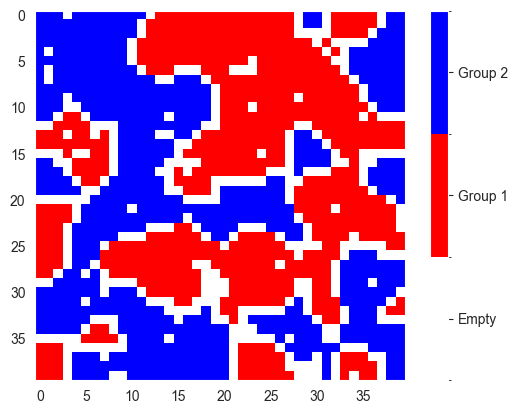

=== Iteration: 102 ===
Convergence reached at iteration 102


In [30]:
grid_size = 40
empty_ratio = 0.2 
similarity_threshold = 0.7 
max_iterations = 200
allow_individuals = False
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

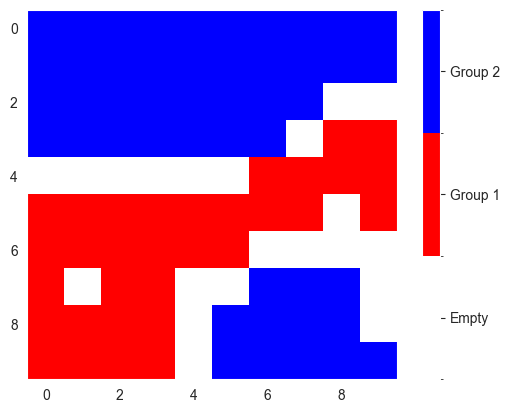

=== Iteration: 71 ===
Convergence reached at iteration 71


In [31]:
grid_size = 10
empty_ratio = 0.2
similarity_threshold = 0.7
max_iterations = 200
allow_individuals = False
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

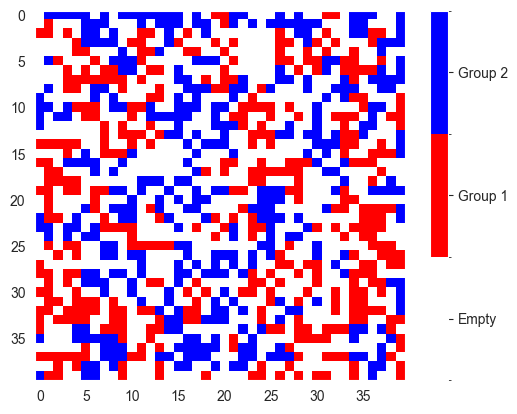

=== Iteration: 44 ===
Convergence reached at iteration 44


In [32]:
grid_size = 40
empty_ratio = 0.5
similarity_threshold = 0.5
max_iterations = 200
allow_individuals = False
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

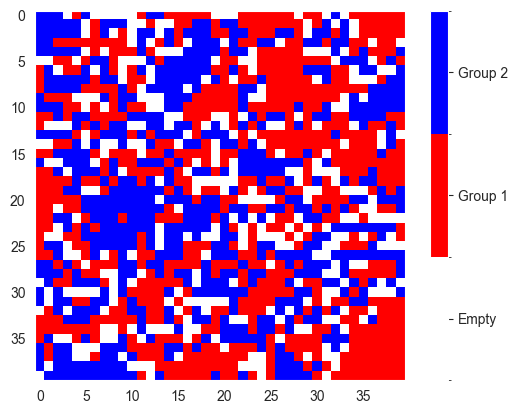

=== Iteration: 99 ===
Maximum iterations reached!


In [33]:
grid_size = 40
empty_ratio = 0.2
similarity_threshold = 0.8
max_iterations = 100 # know this won't converge at 200 so ending early 
allow_individuals = False
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

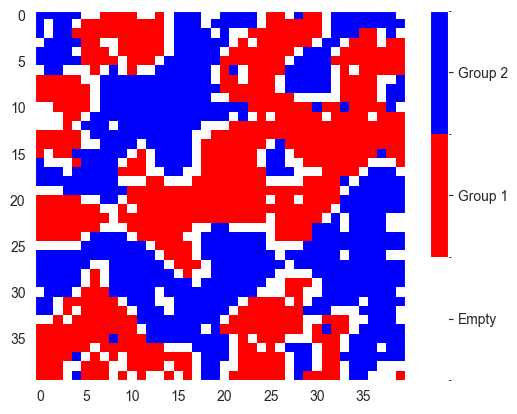

=== Iteration: 99 ===
Maximum iterations reached!


In [34]:
grid_size = 40
empty_ratio = 0.2
similarity_threshold = 0.7
max_iterations = 100 # know this won't converge at 200 so ending early 
allow_individuals = False
randomness_ratio = 0.1

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

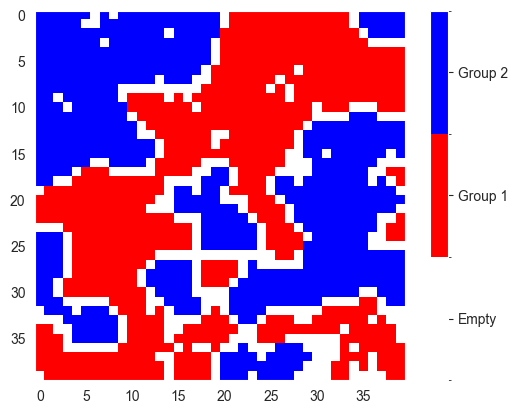

=== Iteration: 40 ===
Convergence reached at iteration 40


In [35]:
grid_size = 40
empty_ratio = 0.2
similarity_threshold = 0.7
max_iterations = 200
allow_individuals = False
randomness_ratio = 0.8

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

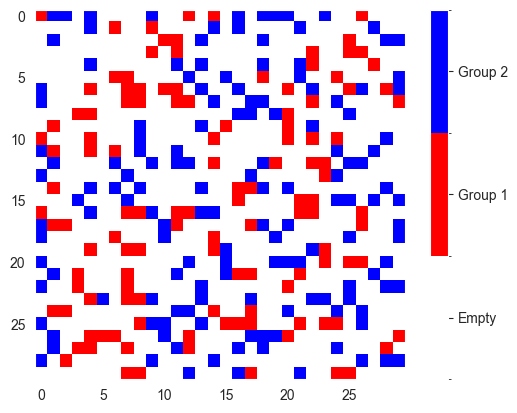

=== Iteration: 31 ===
Convergence reached at iteration 31


In [36]:
grid_size = 30
empty_ratio = 0.7
similarity_threshold = 0.5
max_iterations = 200
allow_individuals = True
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()

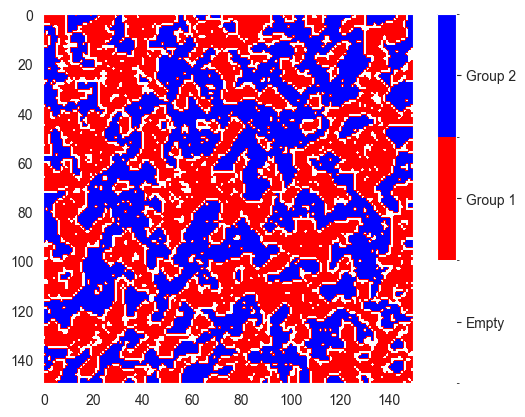

=== Iteration: 176 ===
Convergence reached at iteration 176


In [15]:
grid_size = 150
empty_ratio = 0.2 
similarity_threshold = 0.7 
max_iterations = 300
allow_individuals = False
randomness_ratio = 0.3

model = SchellingModel(grid_size, empty_ratio, similarity_threshold, max_iterations, allow_individuals=allow_individuals, randomness_ratio=randomness_ratio)
model.run()